#               # Data Science Домашнє завдання модуль 2 
                 Частина друга: Аналіз файлів

Імпорт модулів

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

Скачуємо запропонований файл для аналізу за посиланням в завданні і переміщаємо в папку з завданням. Імя файлу "2017_jun_final.csv"

In [39]:
df = pd.read_csv("2017_jun_final.csv") # Передаємо  наш файл "2017_jun_final.csv" - в зміну df* -для подальшого аналізу .
                                       # pd.read_csv("імя_файлу.csv") - Метод для зчитування файлів з розширенням .csv*

1. Вивести перші рядки таблиці за допомогою методу head

In [40]:
df.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


2. Визначте розмір таблиці за допомогою методу shape

In [41]:
rows, columns = df.shape
print("Кількість рядків: ", rows)
print("Кількість стовбців: ", columns)

Кількість рядків:  8704
Кількість стовбців:  25


3. Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [42]:
df.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

4.Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

Алгоритм обрахунку :   
   Формула кількість пустих кліток(NaN) в совпці ділимо на кількість всіх кліток і множимо на 100 отримуємо відсоток пустих кліток в кожному стовпці 

In [43]:
missing_percentage = (df.isnull().sum() / len(df)) * 100 
missing_percentage_rounded = missing_percentage.round(1)
print(missing_percentage_rounded)

N                                    0.0
Посада                               0.0
Мова програмування                  44.2
Спеціалізація                       82.9
Загальний досвід роботи              0.0
Досвід роботи на поточному місці     0.0
Зарплата на місяць                   0.0
Зміна зарплати за 12 місяців         0.0
Місто                                0.0
Розмір компанії                      0.0
Тип компанії                         0.0
Стать                                0.0
Вік                                  0.0
Освіта                               0.0
Університет                          4.1
Ще студент                           0.0
Рівень англійської                   0.0
Предметна область                    2.6
Дата заповнення                      0.0
User.Agent                           0.0
exp                                  0.0
current_job_exp                      0.0
salary                               0.0
Валюта                              99.9
cls             

5.Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [44]:
data = df
columns=[]
for column in data.columns:
  if data[column].isnull().sum() > 0 and column != 'Мова програмування':
    columns.append(column)
    data = data.drop(column, axis=1)
print(f"Стовпці які видалило : {columns}")
print(100*"=")
data.head()

Стовпці які видалило : ['Спеціалізація', 'Університет', 'Предметна область', 'Валюта', 'cls']


,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харків,до 10 осіб,Аутсорсингова,жіноча,20,Неповна Вища,True,Pre-intermediate (нище середнього),12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,Аутсорсингова,жіноча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одеса,до 200 осіб,Продуктова,чоловіча,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,чоловіча,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500


6.Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [45]:
missing_percentage = (data.isnull().sum() / len(df)) * 100 
missing_percentage_rounded = missing_percentage.round(1)
print(missing_percentage_rounded)

N                                    0.0
Посада                               0.0
Мова програмування                  44.2
Загальний досвід роботи              0.0
Досвід роботи на поточному місці     0.0
Зарплата на місяць                   0.0
Зміна зарплати за 12 місяців         0.0
Місто                                0.0
Розмір компанії                      0.0
Тип компанії                         0.0
Стать                                0.0
Вік                                  0.0
Освіта                               0.0
Ще студент                           0.0
Рівень англійської                   0.0
Дата заповнення                      0.0
User.Agent                           0.0
exp                                  0.0
current_job_exp                      0.0
salary                               0.0
dtype: float64


7.Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [46]:
data = data.dropna()
data.head()

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
2,3,Software Engineer,C#/.NET,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одеса,до 200 осіб,Продуктова,чоловіча,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,чоловіча,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
6,7,Junior Software Engineer,C#/.NET,1,менше 3 місяців,600,100,Хмельницький,до 50 осіб,Аутсорсингова,чоловіча,23,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600
7,8,Senior Software Engineer,C++,6,1,3300,500,Київ,до 10 осіб,Продуктова,чоловіча,28,Вища,False,Upper-Intermediate (вище середнього),12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300


8.Визначте новий розмір таблиці за допомогою методу shape

In [47]:
rows, columns = data.shape
print("Кількість рядків: ", rows)
print("Кількість стовбців: ", columns)

Кількість рядків:  4854
Кількість стовбців:  20


9.Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [48]:
python_data = data[data["Мова програмування"] == "Python"]
python_data.head()

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,менше 3 місяців,800,200,Київ,до 50 осіб,Аутсорсингова,чоловіча,26,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Київ,до 10 осіб,Стартап,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Київ,до 10 осіб,Аутсорсингова,чоловіча,19,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Київ,до 1000 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,False,Intermediate (середній),12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Київ,до 10 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


10.Визначте розмір таблиці python_data за допомогою методу shape

In [49]:
rows, columns = python_data.shape
print("Таблиця python_data має наступні розміри : ")
print("Кількість рядків: ", rows)
print("Кількість стовбців: ", columns)

Таблиця python_data має наступні розміри : 
Кількість рядків:  207
Кількість стовбців:  20


11.Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [50]:
gr_by_posada = python_data.groupby('Посада')
gr_by_posada

12.Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [51]:
salary = gr_by_posada['Зарплата на місяць'].agg(['min', 'max'])
salary

,min,max
Посада,,
Junior Software Engineer,100,1250
Senior Software Engineer,1300,9200
Software Engineer,500,5400
System Architect,3000,5000
Technical Lead,1425,6200


13.Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [52]:
def fill_avg_salary(row):
    '''Функція обчислює середнє значення для вибраних стовпців і повертає їх''' 
    return row.mean()


salary[('Зарплата за месяць', 'avg')] = salary.apply(fill_avg_salary, axis=1) # Використовуємо apply для обчислення середньої зарплати по рядках
salary # Виводимо результат.

,min,max,"(Зарплата за месяць, avg)"
Посада,,,
Junior Software Engineer,100,1250,675.0
Senior Software Engineer,1300,9200,5250.0
Software Engineer,500,5400,2950.0
System Architect,3000,5000,4000.0
Technical Lead,1425,6200,3812.5


14.Створіть описову статистику за допомогою методу describe для нового стовпчика

In [53]:
stat = salary[('Зарплата за месяць','avg')].describe()
pd.DataFrame(stat.apply(lambda x: int(x)))

,Зарплата за месяць
,avg
count,5
mean,3337
std,1700
min,675
25%,2950
50%,3812
75%,4000
max,5250


15.Збережіть отриману таблицю в CSV файл

In [54]:
salary.to_csv('Salary_new_data.csv') # Створює файл з розширенням .csv  і заданою назвою в поточній папці.

# Візуалізація даних


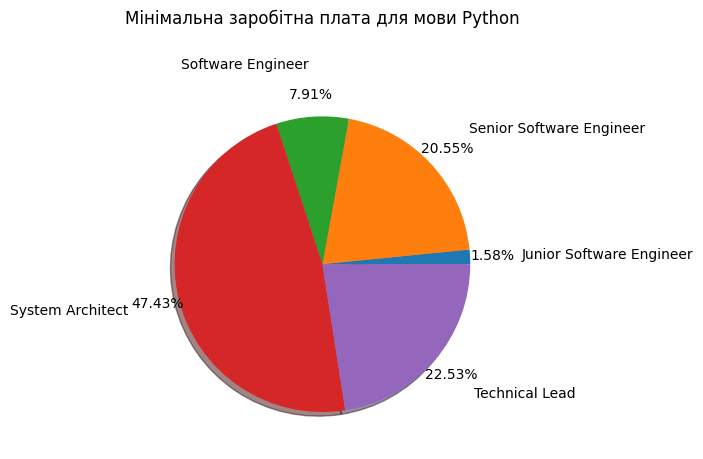

In [55]:
plt.pie(
    salary['min'],
    labels=salary.index,
    shadow=True,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)
plt.title('Мінімальна заробітна плата для мови Python', pad=40)
plt.show()
     

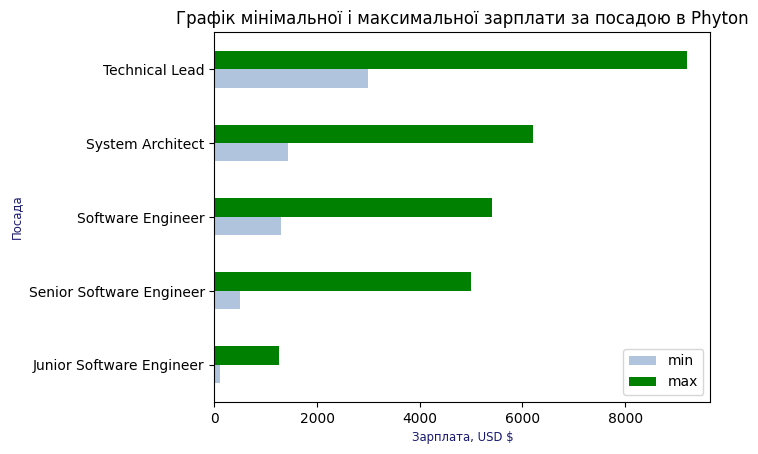

In [56]:
position = list(salary.index)

salaries_1 = list(salary['min'].sort_values(ascending=True))

salaries_2 = list(salary['max'].sort_values(ascending=True))

df_plot = pd.DataFrame({ 'min': salaries_1, 'max': salaries_2}, index=position)
df_plot.plot.barh(color=['lightsteelblue', 'g'])
plt.title('Графік мінімальної і максимальної зарплати за посадою в Phyton')
plt.xlabel('Зарплата, USD $', fontsize='small', color='midnightblue')
plt.ylabel('Посада', fontsize='small', color='midnightblue')
plt.show()

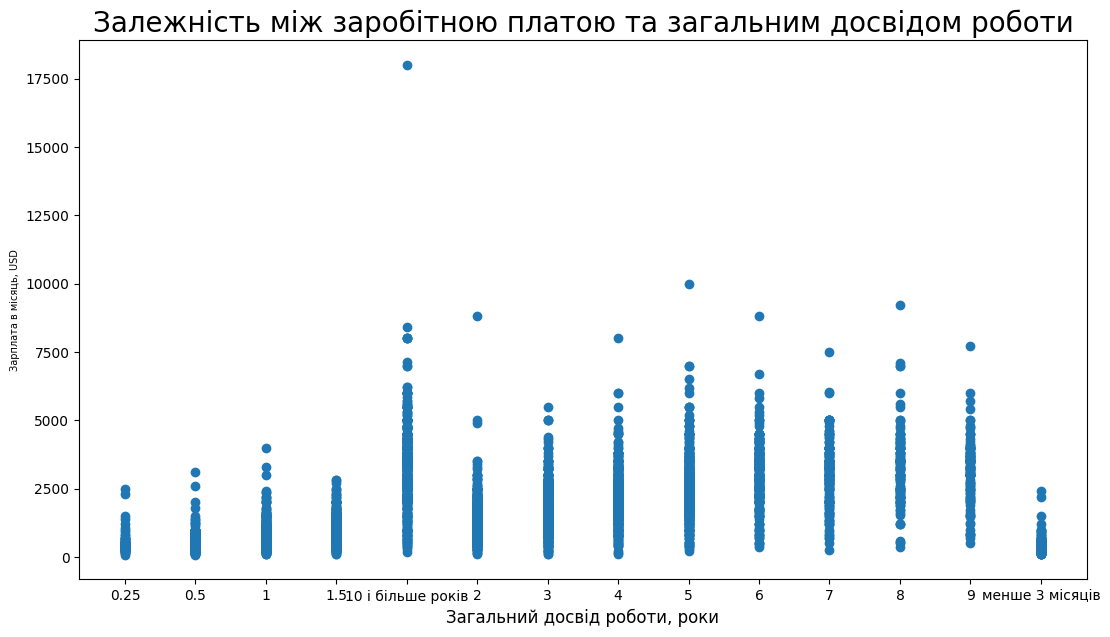

In [57]:
data_sorted = data.sort_values(by='Загальний досвід роботи')

plt.figure(figsize=(13, 7))
plt.scatter(data_sorted['Загальний досвід роботи'], data_sorted['Зарплата на місяць'])
plt.title('Залежність між заробітною платою та загальним досвідом роботи', fontsize=20)
plt.xlabel('Загальний досвід роботи, роки', fontsize=12)
plt.ylabel('Зарплата в місяць, USD', fontsize=7)
plt.show()